In [17]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from superai.regression.model.linear_regression import Linear_Regression, polynomial_expand

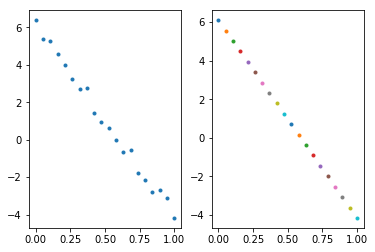

In [18]:
# 一元线性回归
X = np.linspace(0, 1, 20)
salt = np.random.rand(20) - 0.5
Y = -10*X + 6 + salt

plt.subplot(1, 2, 1)
plt.plot(X, Y, '.')

X = X[np.newaxis, :]
Y = Y[np.newaxis, :]
model = Linear_Regression(1)
model.fit(X, Y, 0.1, verbose=False)

Y_ = model.predict(X)
plt.subplot(1, 2, 2)
plt.plot(X, Y_, '.')

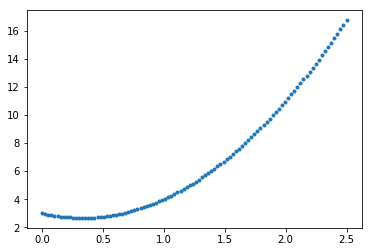

In [33]:
X = np.linspace(0, 2.5, 100)
Y = 3 * X**2 - 2 * X + 3
plt.plot(X, Y, '.')

X = X[np.newaxis, :]
Y = Y[np.newaxis, :]

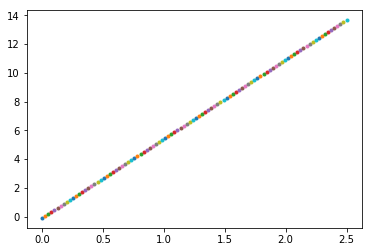

In [34]:
model = Linear_Regression(1)
model.fit(X, Y, 0.1, 2000, verbose=False)
Y_ = model.predict(X)
plt.plot(X, Y_, '.')

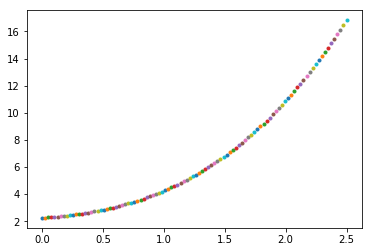

In [36]:
X_ = polynomial_expand(X, 3)
min_ = np.min(X_, axis=1, keepdims=True)
max_ = np.max(X_, axis=1, keepdims=True)
train_data = (X_ - min_) / ((max_ - min_) + 1e-32)

model = Linear_Regression(3)
model.fit(train_data, Y, 0.1, 2000, verbose=False)

Y_ = model.predict(train_data)
plt.plot(X, Y_, '.')

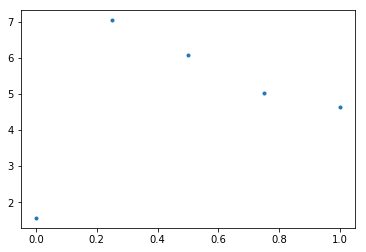

In [83]:
X = np.linspace(0, 1, 5)
Y = np.random.rand(5) * 10
plt.plot(X, Y, '.')

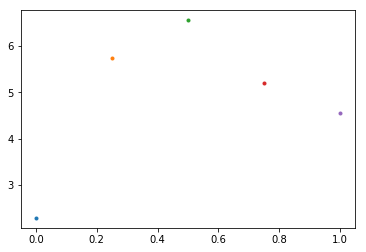

In [84]:
model = Linear_Regression(5)
X_ = X[np.newaxis, :]
X_ = polynomial_expand(X_, 5)
Y = Y[np.newaxis, :]
min_ = np.min(X_, axis=1, keepdims=True)
max_ = np.max(X_, axis=1, keepdims=True)
train_data = (X_ - min_) / ((max_ - min_) + 1e-32)
model.fit(train_data, Y, 0.1, 10000, verbose=False)
Y_ = model.predict(train_data)
plt.plot(X[np.newaxis, :], Y_, '.')

In [ ]:
# 多元线性回归--波士顿房价预测问题
boston = load_boston()

# 预处理训练数据
train_data = boston['data']
train_data = train_data.transpose()
# 归一化
min_ = np.min(train_data, axis=1, keepdims=True)
max_ = np.max(train_data, axis=1, keepdims=True)
train_data = (train_data - min_) / ((max_ - min_) + 1e-32)


# 预处理“标签”
label = boston['target']
label = label[np.newaxis, :]

#print(boston["DESCR"])
#print(boston['feature_names'])

model = Linear_Regression(13)
model.fit(train_data, label, 0.1)